In [1]:
import numpy as np

from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('2.csv')
df2 = pd.read_csv('ha_measures.csv')

df['Normalized_RMSE_1'] = 1 - df.Normalized_RMSE
df['RMSE_1'] = 1 - df.RMSE

In [3]:
list(df2)

['Material',
 'spcegroup',
 'fc_3_norm',
 'debye_temp',
 'vg',
 'gruneisen_300',
 'gruneisen_sq_norm_300',
 'gruneisen_600',
 'gruneisen_sq_norm_600',
 'gruneisen_900',
 'gruneisen_sq_norm_600.1',
 'RMSE_300',
 'RMSE_1_300',
 'Normalized_RMSE_Forces_300',
 'Normalized_RMSE_Forces_1_300',
 'Normalized_RMSE_Vol_300',
 'Normalized_RMSE_Vol_1_300',
 'Max_Dev_Forces_300',
 'Mean_Dev_Forces_300',
 'Max_Dev_Vol_300',
 'Mean_Dev_Vol_300',
 'R2_300',
 'Mean_R2_by_atom_300',
 'Min_R2_by_atom_300',
 'kappa_300',
 'Cv_300',
 'RMSE_600',
 'RMSE_1_600',
 'Normalized_RMSE_Forces_600',
 'Normalized_RMSE_Forces_1_600',
 'Normalized_RMSE_Vol_600',
 'Normalized_RMSE_Vol_1_600',
 'Max_Dev_Forces_600',
 'Mean_Dev_Forces_600',
 'Max_Dev_Vol_600',
 'Mean_Dev_Vol_600',
 'R2_600',
 'Mean_R2_by_atom_600',
 'Min_R2_by_atom_600',
 'kappa_600',
 'Cv_600',
 'RMSE_900',
 'RMSE_1_900',
 'Normalized_RMSE_Forces_900',
 'Normalized_RMSE_Forces_1_900',
 'Normalized_RMSE_Vol_900',
 'Normalized_RMSE_Vol_1_900',
 'Max_Dev_F

/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


KeyError: 'RMSE_1'

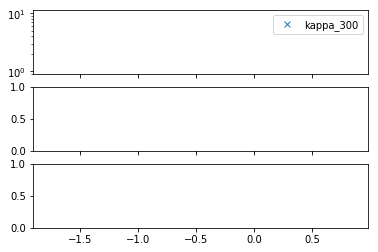

In [23]:
fig, axs = plt.subplots(nrows=3, sharex=True)

df2.plot('R2_300', 'kappa_300', logy=True, style='x', ax=axs[0])
df2.plot('RMSE_1', 'kappa_300', logy=True, style='x', ax=axs[1])
df2.plot('Normalized_RMSE_1', 'kappa_300', logy=True, style='x', ax=axs[2])

axs[0].set_title('r2')
axs[1].set_title('RMSE')
axs[2].set_title('normalized RMSE')
axs[1].set_xlim([0.7, 1])
fig.tight_layout()

/home/knoop/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


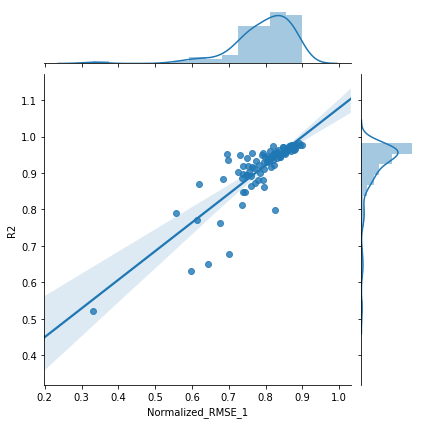

In [24]:
sns.jointplot('Normalized_RMSE_1', 'R2', data=df, kind="reg")

# Plot for Presentation

/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
No handles with labels found to put in legend.


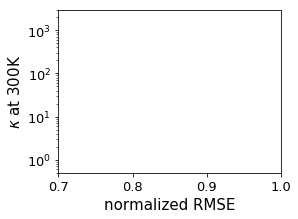

In [25]:
c1 = '#212e43'
# https://artsexperiments.withgoogle.com/artpalette/colors/212e43-b82c4a-761d46-642f7c-cc1e23
c2 = '#b5483f'
# https://artsexperiments.withgoogle.com/artpalette/colors/1f1916-f1e4d6-b5483f-959179-efab2d
c3 = '#8b8c84'
c4 = '#b8a33a'
c5 = '#50504e'
c6 = '#2f2f2b'
c7 = '#2a2b2a'
# https://artsexperiments.withgoogle.com/artpalette/colors/8b8c84-b8a33a-c8c8bd-50504e-ab9e5f

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

settings = {
    'x': 'R2_300',
    'y': 'kappa_300',
    'logy': True,
    'ax': ax,
    'label':'',
    'color': c4,
    'linewidth': .75,
    'marker': 'd',
    's': 75,
    'alpha': .75,
}

df2.plot.scatter(**{**settings, 'color': c5})

# df.plot.scatter(**settings)
# sns.regplot(x='R2', y='kappa_300', ax=ax, label='', data=df)

# ax.semilogy()

fontsize = 15
ax.set_xlabel('normalized RMSE', size=fontsize)
ax.set_ylabel('$\kappa$ at 300K', size=fontsize)

ax.tick_params(labelsize=fontsize-2)

ax.set_ylim([.5, 3000])
ax.set_xlim([.7, 1])
ax.legend().remove()

In [26]:
fig.tight_layout()
fig.savefig('out.png', dpi=300, bbox_inches='tight')

/home/knoop/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


ValueError: low >= high

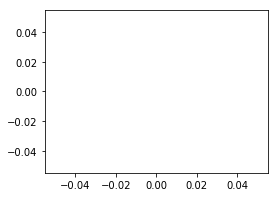

In [27]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

sns.regplot(1/ (1 - df2.R2_300), np.log(df2.kappa_300), ax=ax, color=c5, marker='d')

fontsize = 15
ax.set_xlabel('1 / (1 - $r^2$)', size=fontsize)
ax.set_ylabel('ln $\kappa$', size=fontsize)

ax.tick_params(labelsize=fontsize-2)

# ax.set_ylim([.5, 3000])
# ax.set_xlim([.7, 1])
ax.legend().remove()

fig.tight_layout()
fig.savefig('2.png', dpi=300, bbox_inches='tight')

                            OLS Regression Results                            
Dep. Variable:              kappa_300   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Mar 2019   Prob (F-statistic):                nan
Time:                        12:41:31   Log-Likelihood:                    nan
No. Observations:                 177   AIC:                               nan
Df Residuals:                     175   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/home/knoop/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/home/knoop/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/knoop/local/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/knoop/local/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/knoop/local/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


ValueError: low >= high

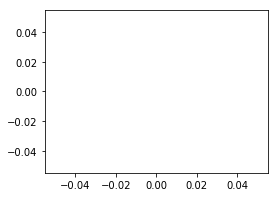

In [28]:
import statsmodels.api as sm

# linear fit
x = 1/ (1 - df2.R2_300)
# x = 1 / df2.Normalized_RMSE
y = np.log(df2.kappa_300)

# X = x.copy()
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

intercept, slope = results.params

print(results.summary())

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

sns.regplot(x, y, ax=ax, color=c5, marker='d')

fontsize = 15
ax.set_xlabel('1 / (1 - $R^2$)', size=fontsize)
ax.set_ylabel('ln $\kappa$', size=fontsize)

ax.tick_params(labelsize=fontsize-2)

# ax.set_ylim([.5, 3000])
# ax.set_xlim([.7, 1])
ax.legend().remove()

fig.tight_layout()
fig.savefig('2.png', dpi=300, bbox_inches='tight')

In [33]:
df2.kappa_300

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
5     -1.0
6     -1.0
7     -1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16    -1.0
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23    -1.0
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
147   -1.0
148   -1.0
149   -1.0
150   -1.0
151   -1.0
152   -1.0
153   -1.0
154   -1.0
155   -1.0
156   -1.0
157   -1.0
158   -1.0
159   -1.0
160   -1.0
161   -1.0
162   -1.0
163   -1.0
164   -1.0
165   -1.0
166   -1.0
167   -1.0
168   -1.0
169   -1.0
170   -1.0
171   -1.0
172   -1.0
173   -1.0
174   -1.0
175   -1.0
176   -1.0
Name: kappa_300, Length: 177, dtype: float64

In [29]:
results.conf_int(alpha=.05)[0], intercept

(const    NaN
 R2_300   NaN
 Name: 0, dtype: float64, nan)

/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


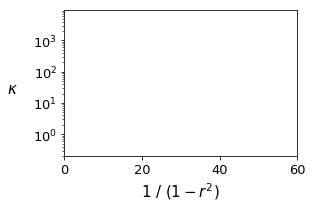

In [30]:
# https://artsexperiments.withgoogle.com/artpalette/colors/848a89-bdb490-4f5443-e1decd-758056
# c1 = '#848a89'
# c2 = '#4f5443'
# c3 = '#758056'

# https://artsexperiments.withgoogle.com/artpalette/colors/e8e6e0-45423e-cbb99e-ae665d-938274
# https://artsexperiments.withgoogle.com/artpalette/colors/e9e6e2-474340-c8ae91-976249-7c7468
# c1 = '#e8e6e0'
# c2 = '#474340'
# c3 = '#cbb99e'
# c4 = '#976249'
# c5 = '#7c7468'

fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_subplot(1, 1, 1)

xs = np.arange(0, 70)

# mean
ax.plot(xs, np.exp(intercept + slope*xs), color=c7, linestyle='--', zorder=0, linewidth=1.5)
# confidence
#conf_int =  results.conf_int(alpha=.01)
#c1, m1 = conf_int[0]
#c2, m2 = conf_int[1]
#ax.fill_between(xs, np.exp(c1 + m1*xs), np.exp(c2 + m2*xs), alpha=0.2, color=c3)

ax.scatter(x, df2.kappa_300, color=c5, marker='d', alpha=.8)
ax.set_yscale('log')

fontsize = 15
ax.set_xlabel('1 / $(1 -r^2)$', size=fontsize)
ax.set_ylabel('$\kappa$', size=fontsize, rotation=0)
ax.yaxis.set_label_coords(-.22, .41)

ax.tick_params(labelsize=fontsize-2)

ax.legend().remove()

ax.set_ylim(.2, 9500)
ax.set_xlim(0, 60)

fig.tight_layout()
fig.savefig('3.png', dpi=300, bbox_inches='tight')
fig.savefig('3.pdf', bbox_inches='tight')